# Installation and Visualization

## First Steps

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip3 install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
!pip install nilearn

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from nilearn import image
from nilearn import plotting

# getting rest image from Patient 29006
smoothed_img = image.smooth_img('drive/MyDrive/rest.nii', fwhm = 1)
image.get_data(smoothed_img)
print(type(smoothed_img))
print(smoothed_img.affine)
print(smoothed_img.header)

<class 'nibabel.nifti1.Nifti1Image'>
[[-3.75000000e+00  6.50163961e-22 -1.35525272e-20  1.16938728e+02]
 [-6.51818323e-22  3.75000000e+00  1.08420217e-19 -1.46247482e+02]
 [ 0.00000000e+00 -5.42101086e-20  4.00000000e+00 -1.04225983e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  64  64  50 120   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    3.75  3.75  4.    0.    0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1959.0
cal_min         : 0.0
slice_duration  : 0.0
toffset     

In [4]:
#print(image.load_img(smoothed_img).shape)  ##Look at this and reduce

#for i in range(20):
  #still = image.index_img(smoothed_img, i)
  #plotting.plot_anat(still)

## Harvard-Oxford Atlas

In [5]:
from nilearn import datasets
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels[1:]
print(labels)
print(len(labels))


Dataset created in /root/nilearn_data/fsl



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/245b1ae3f43e3ea47e2ed9f438694f4a/HarvardOxford.tgz...

['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior division', 'Lateral Occipital Cortex, inferior division', 'Intracalcarine Cortex', 'Frontal Medial Cortex', 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)', 'Subcallosal Cortex', 'Paracingulate Gyrus', 'Cing

.. done.


In [6]:
labels

['Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallosal Cortex',
 '

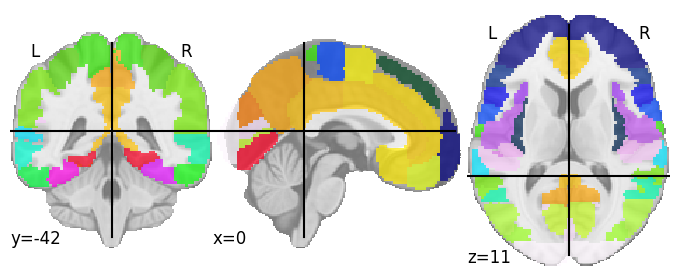

In [7]:
from nilearn import plotting
plotting.plot_roi(atlas_filename)

In [8]:
from nilearn.maskers import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=False)

[[0.15643296 0.91022533 0.21230236 ... 0.67517114 0.96707475 0.89141285]
 [0.14985964 0.89834696 0.20141909 ... 0.6655348  0.9621257  0.8863782 ]
 [0.14804724 0.8932056  0.20048468 ... 0.663305   0.95881057 0.8837226 ]
 ...
 [0.15568215 0.880845   0.23447984 ... 0.65653    0.9471129  0.88128155]
 [0.15527388 0.8787078  0.22452176 ... 0.65585905 0.9436083  0.88129926]
 [0.15332349 0.8842196  0.21753907 ... 0.6588059  0.94922036 0.88527507]]


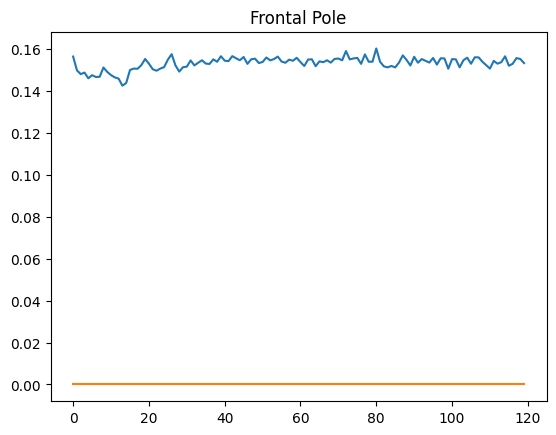

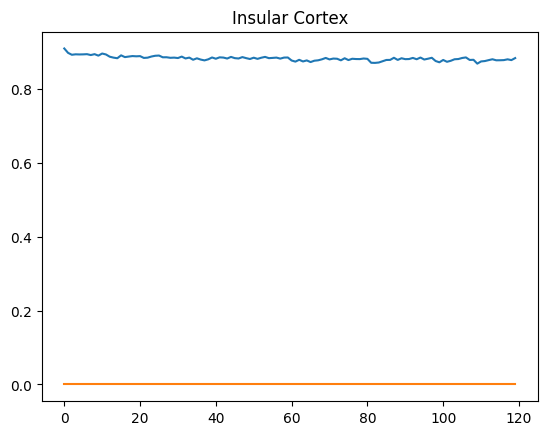

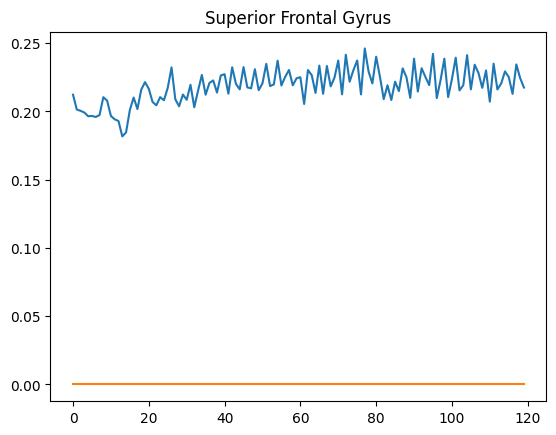

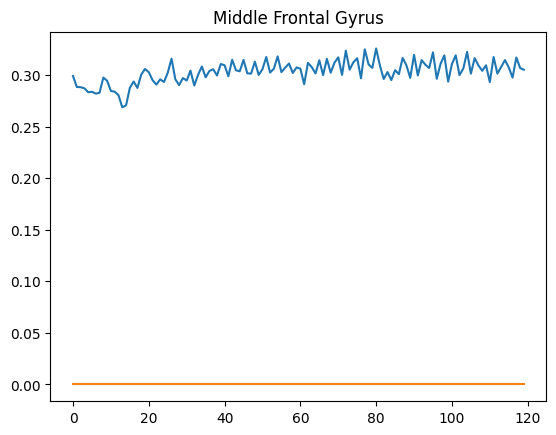

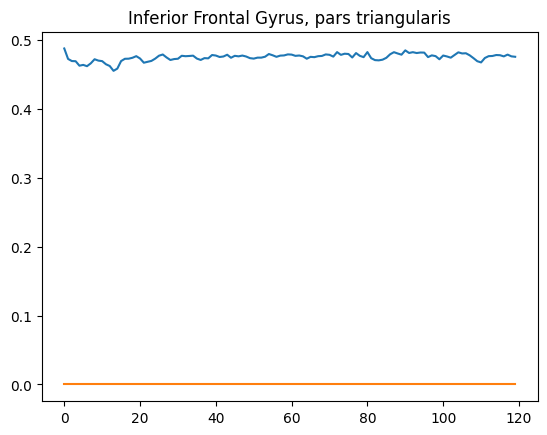

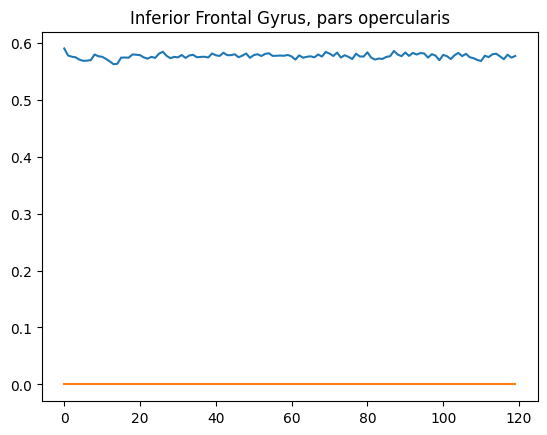

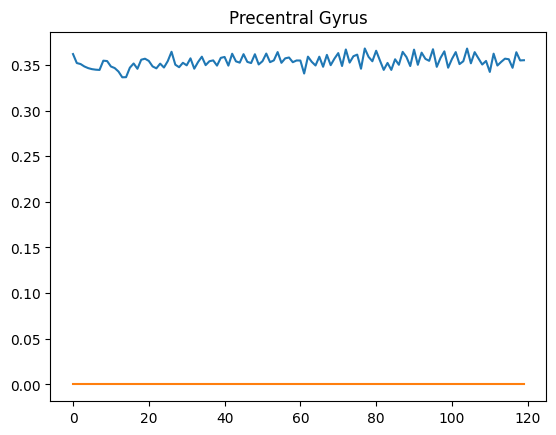

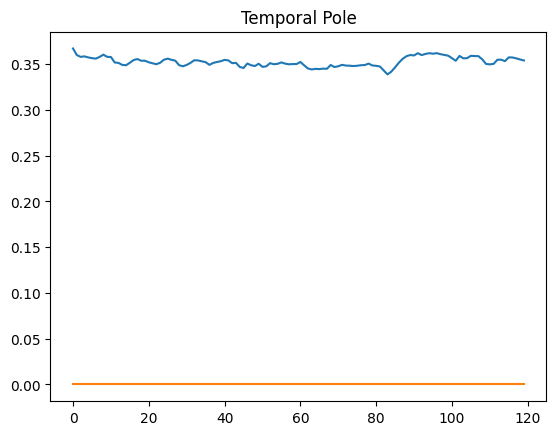

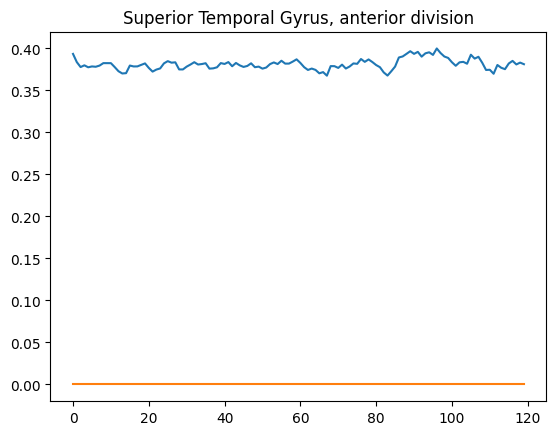

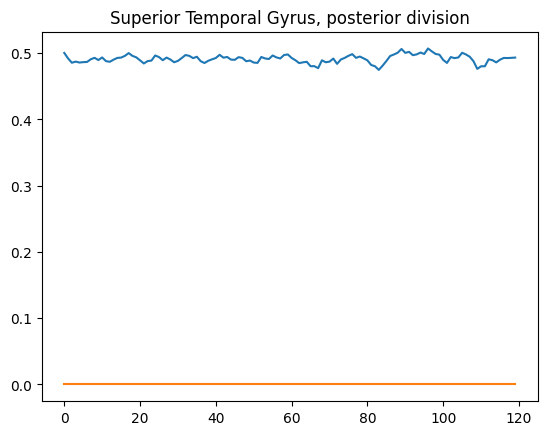

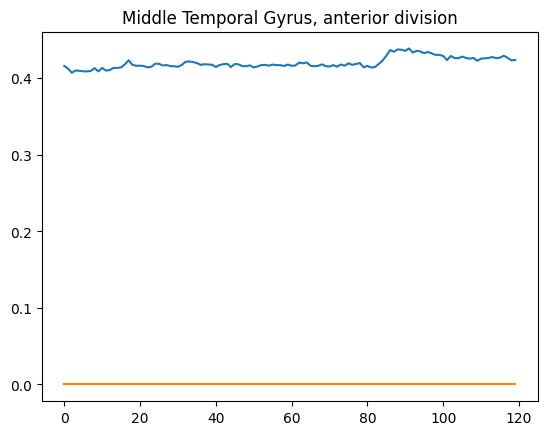

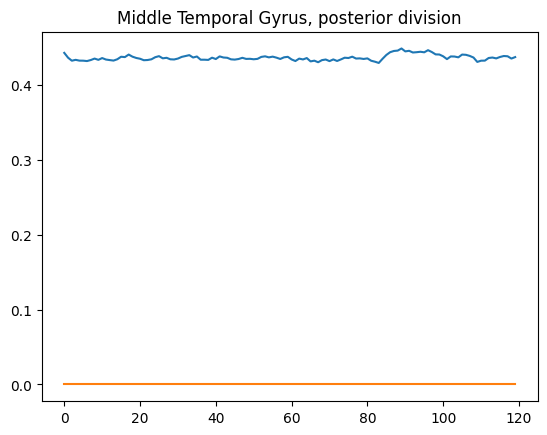

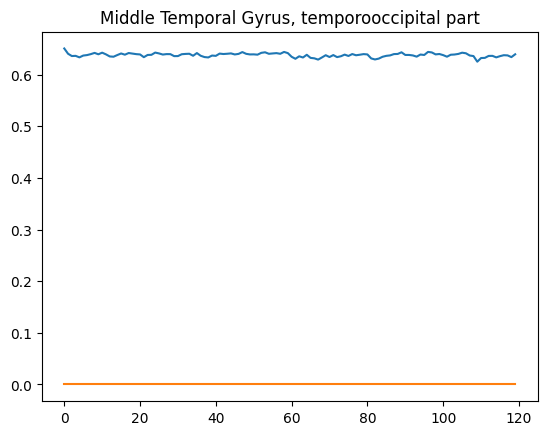

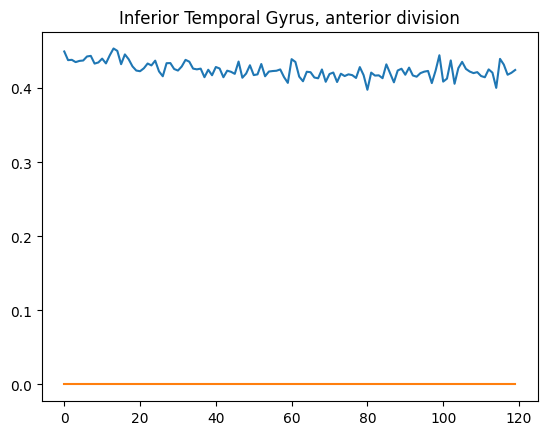

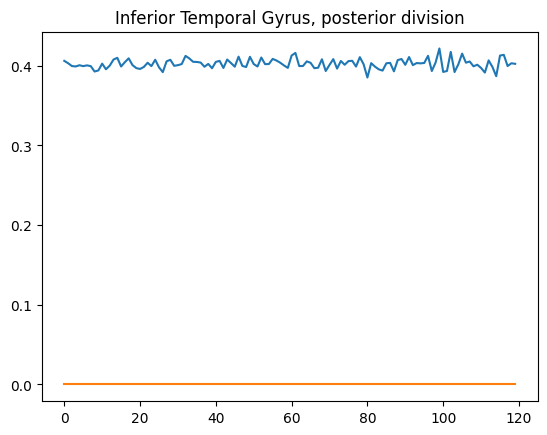

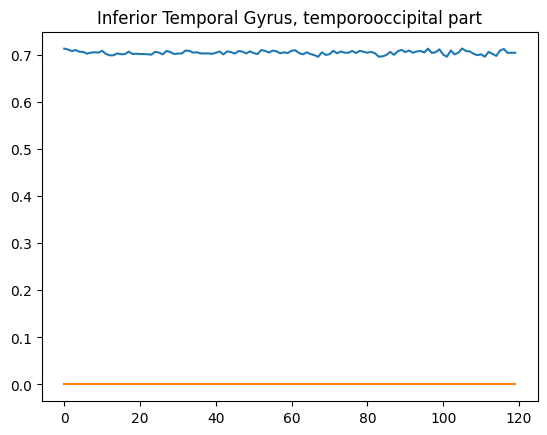

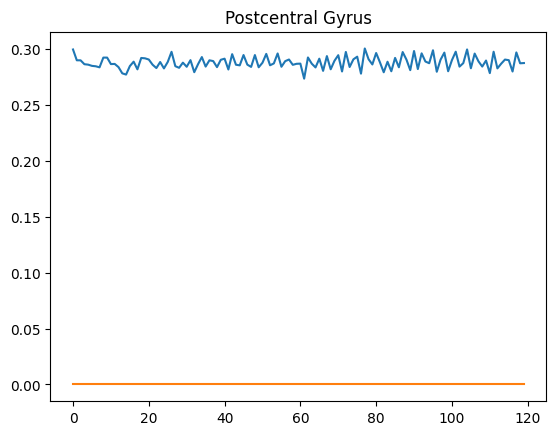

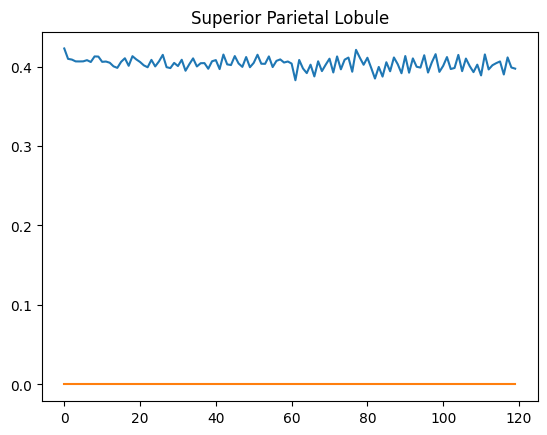

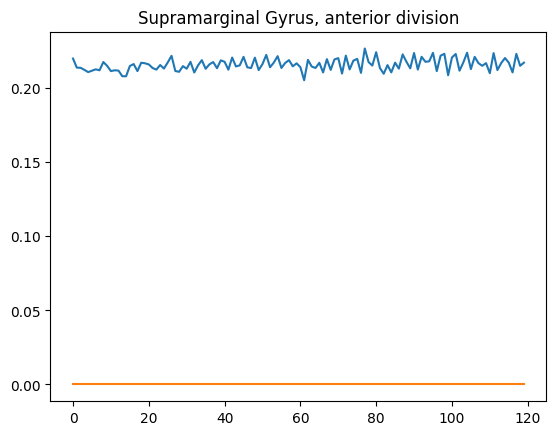

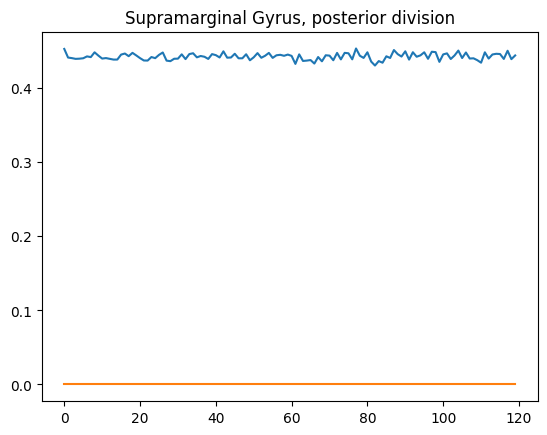

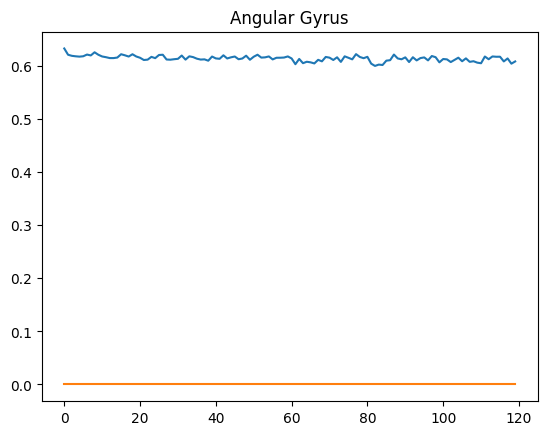

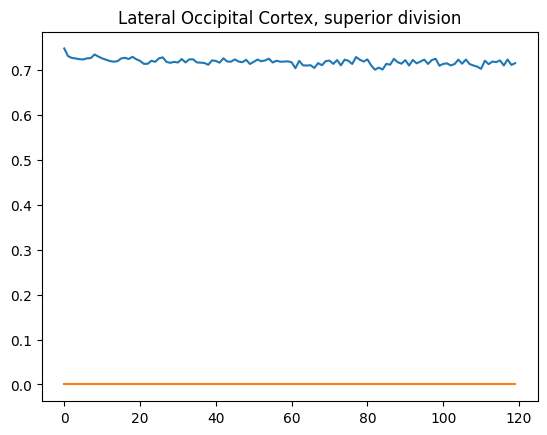

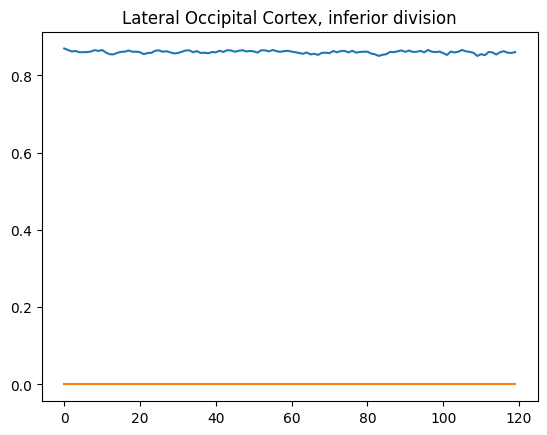

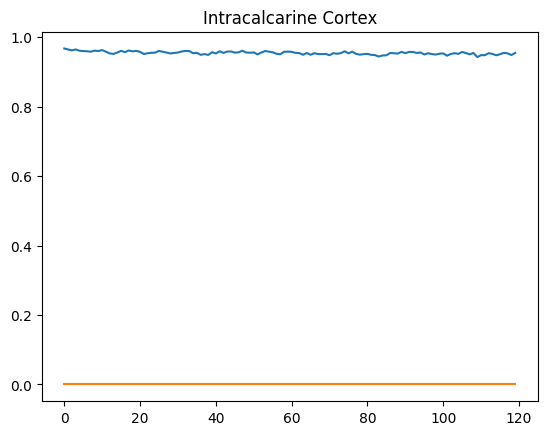

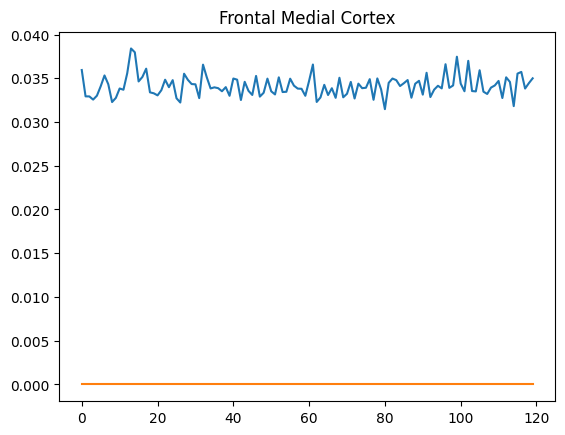

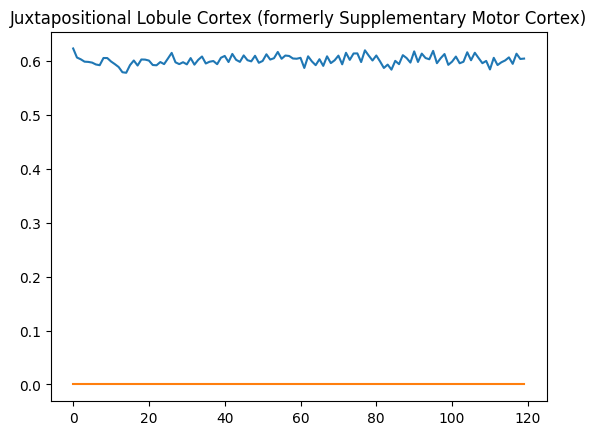

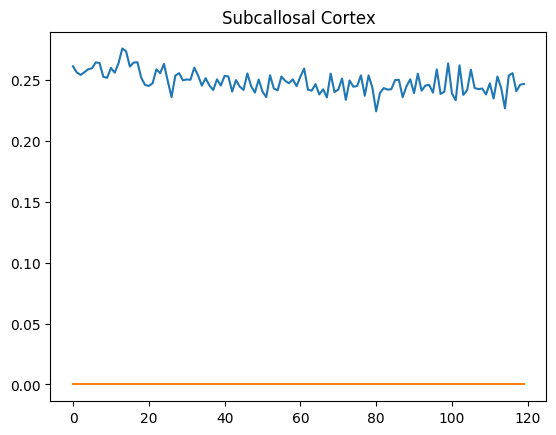

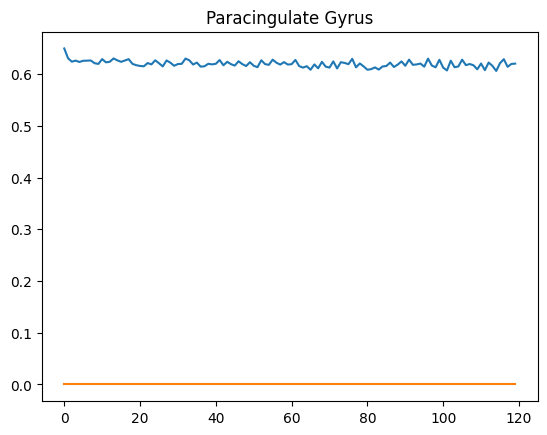

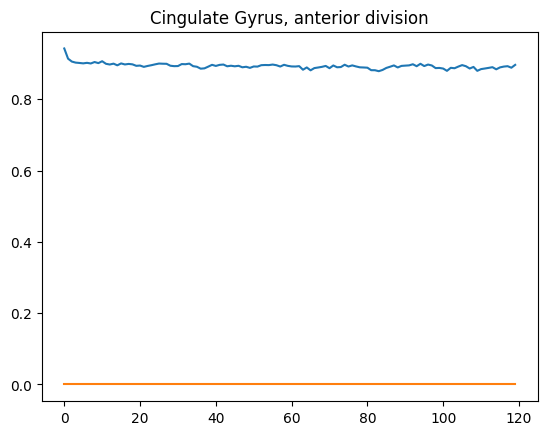

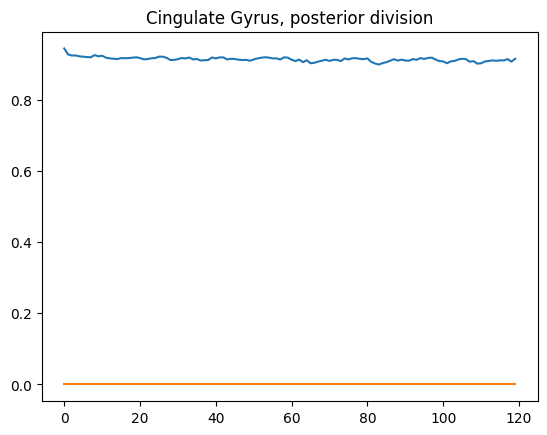

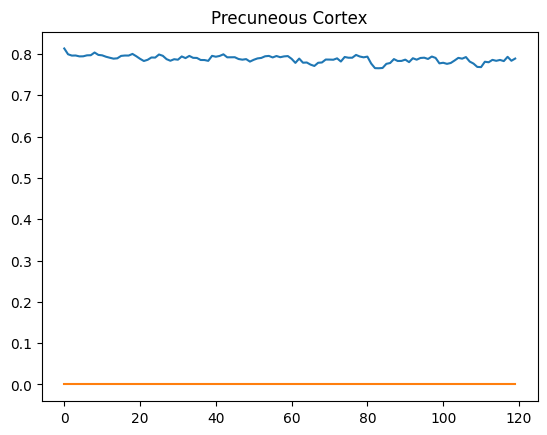

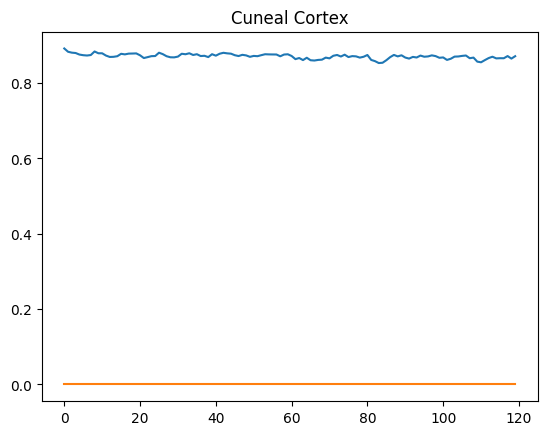

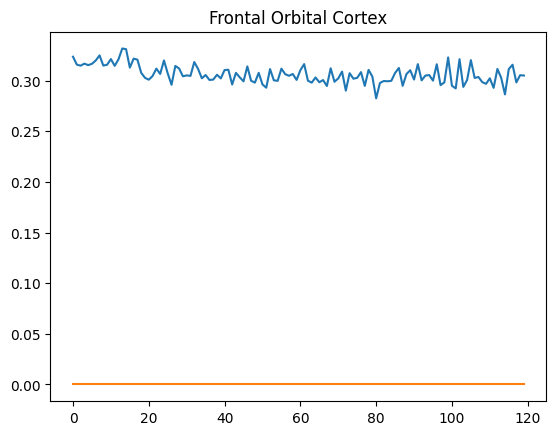

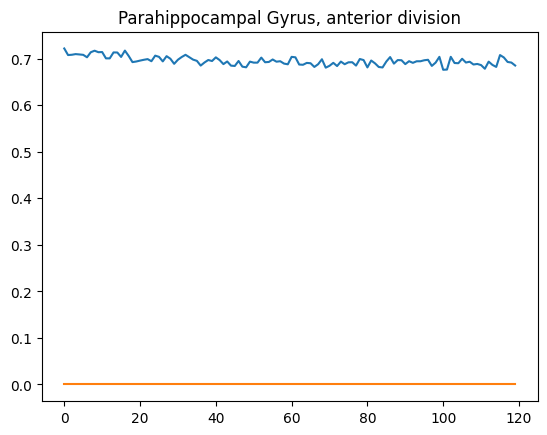

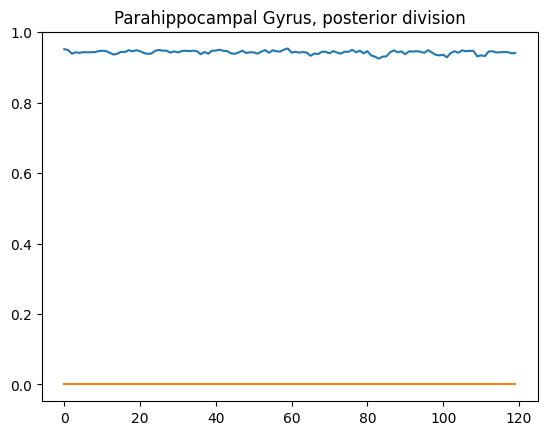

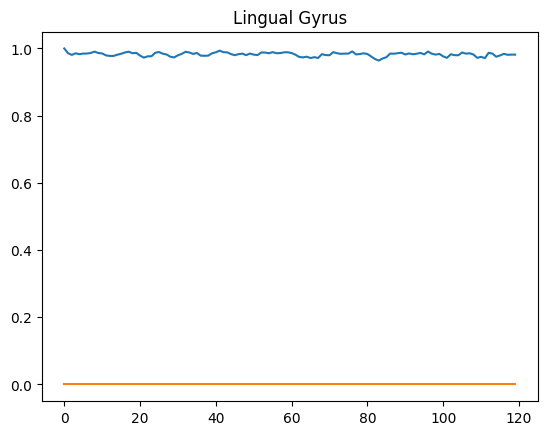

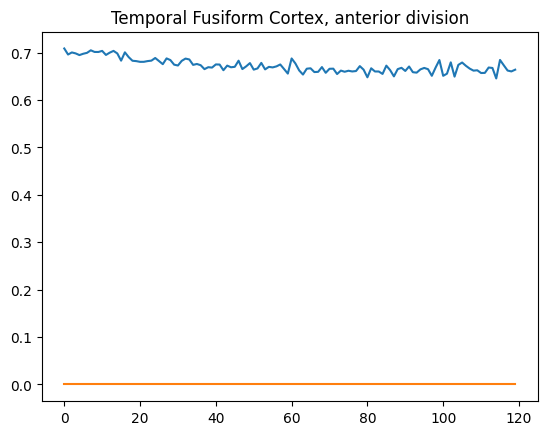

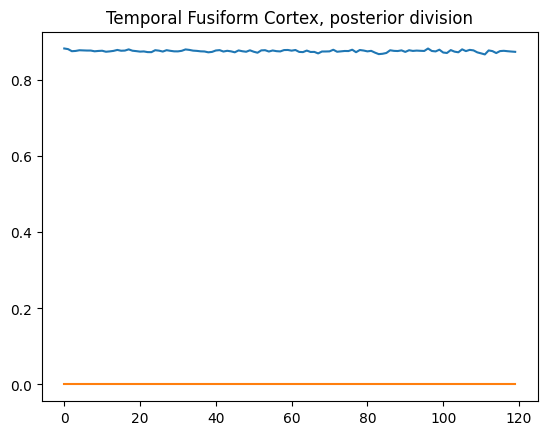

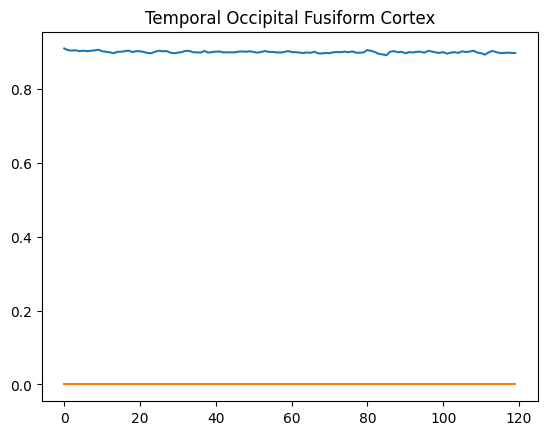

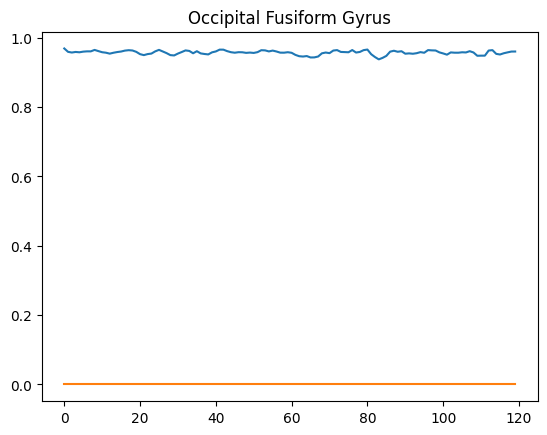

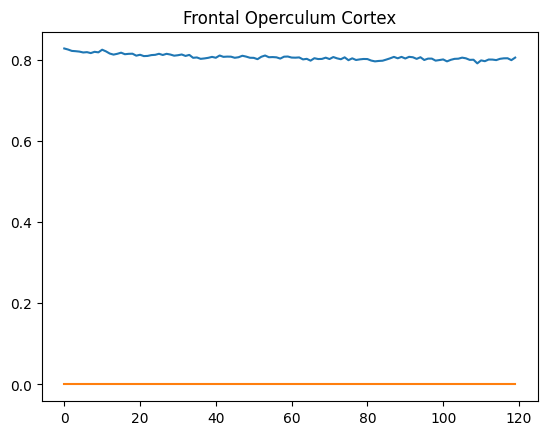

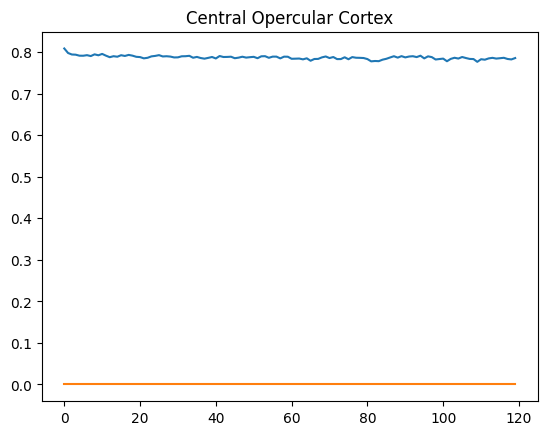

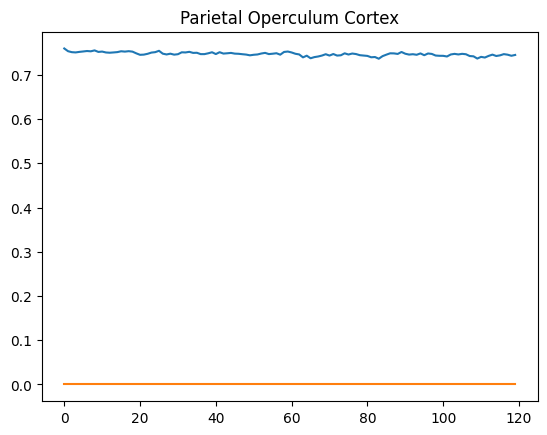

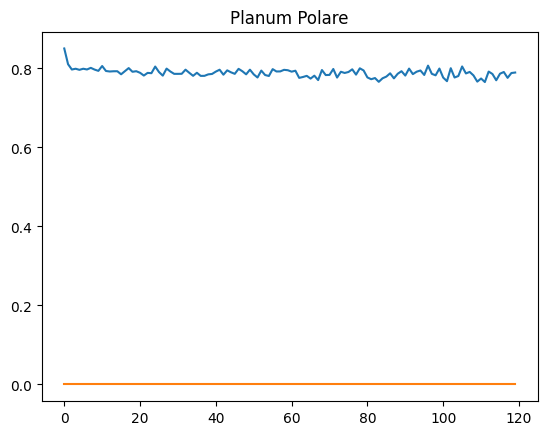

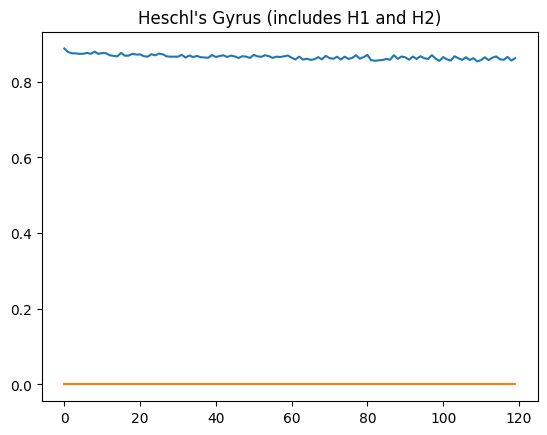

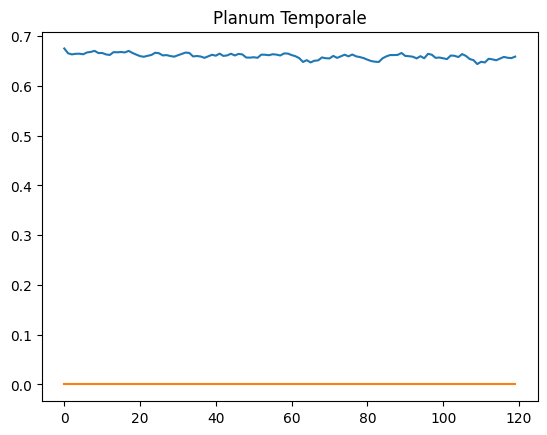

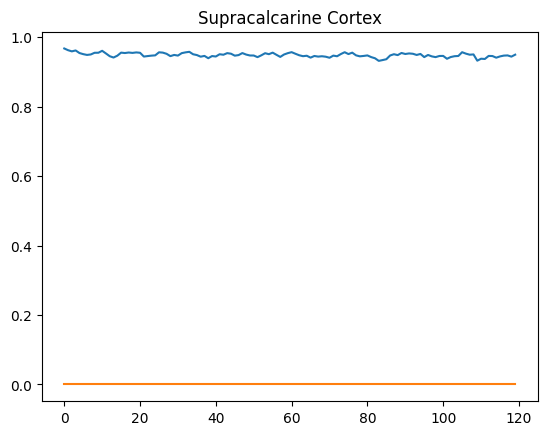

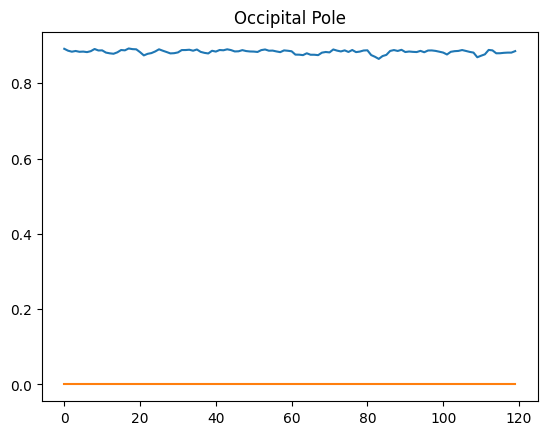



(120, 48)
(48, 120)


In [9]:
time_series = masker.fit_transform(smoothed_img)

# How best should we normalize this time series?

time_series = time_series/np.max(time_series)
print(time_series)

graph_time_series = time_series.T
for i in range(len(graph_time_series)):
  a = plt.plot(range(120), graph_time_series[i])
  b = plt.plot(range(120), [0]*120)
  plt.title(labels[i])
  plt.show(a, b)

print("\n")
print(time_series.shape)
print(graph_time_series.shape)

## Juelich Atlas

In [ ]:
from nilearn import datasets
dataset2 = datasets.fetch_atlas_juelich('maxprob-thr0-2mm')
atlas_filename2 = dataset2.maps
labels2 = dataset2.labels[1:]
print(labels2)
print(len(labels2))

In [ ]:
plotting.plot_roi(atlas_filename2)

In [ ]:
from nilearn.maskers import NiftiLabelsMasker
masker2 = NiftiLabelsMasker(labels_img=atlas_filename2, standardize=True)

In [ ]:
time_series2 = masker2.fit_transform(smoothed_img)
time_series2 = time_series2/np.max(time_series2)
print(time_series2)

graph_time_series2 = time_series2.T
for i in range(len(graph_time_series2)):
  a = plt.plot(range(120), graph_time_series2[i])
  b = plt.plot(range(120), [0]*120)
  plt.title(labels2[i])
  plt.show(a, b)

print("\n")
print(time_series2.shape)
print(graph_time_series2.shape)

More atlases can be found [here](https://nilearn.github.io/stable/modules/reference.html#atlases), and their specific requirements can be found on their individual documentation pages.

## Connectivity Matrices

In [ ]:
#from nilearn.connectome import ConnectivityMeasure

#correlation_measure = ConnectivityMeasure(kind='correlation')
#correlation_matrix = correlation_measure.fit_transform([time_series])[0]

#np.fill_diagonal(correlation_matrix, 0)
#plotting.plot_matrix(correlation_matrix, figure=(10, 10), labels=labels, vmax=0.8, vmin=-0.8, reorder=True)
#plotting.show()

In [ ]:
#correlation_measure2 = ConnectivityMeasure(kind='correlation')
#correlation_matrix2 = correlation_measure2.fit_transform([time_series2])[0]

#np.fill_diagonal(correlation_matrix2, 0)
#plotting.plot_matrix(correlation_matrix2, figure=(10, 10), labels=labels2, vmax=0.8, vmin=-0.8, reorder=True)
#plotting.show()

## Statistical Analysis

In [ ]:
ts_df = pd.DataFrame(time_series, columns = labels)
ts_df.describe()

In [ ]:
np.median(time_series, axis = 0)

In [ ]:
median_MSE = np.sum(np.median(time_series, axis = 0)**2)
median_MSE

# Further Preprocessing

## Fetching Data

This is commented out for now because I have the data from the next section stored in CSVs, so there's no need to wait 30 minutes every time for this section to load.

In [10]:
#from nilearn.datasets import fetch_abide_pcp

s = 40
# We specify the site and number of subjects we want to download
#abideA = fetch_abide_pcp(derivatives=['func_preproc'],
#                        SITE_ID=['NYU'], DX_GROUP={1}, n_subjects=s)  #58

#abideH = fetch_abide_pcp(derivatives=['func_preproc'],
#                        SITE_ID=['NYU'], DX_GROUP={2}, n_subjects=s)  #58



Dataset created in /root/nilearn_data/ABIDE_pcp



 ...done. (1 seconds, 0 min)
/usr/local/lib/python3.9/dist-packages/nilearn/datasets/func.py:1019: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Downloaded 70909952 of 107440893 bytes (66.0%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 76169216 of 96773241 bytes (78.7%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 71000064 of 103892284 bytes (68.3%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 69632000 of 105458974 bytes (66.0%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 70410240 of 98717272 bytes (71.3%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 75317248 of 105931244 bytes (71.1%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 72040448 of 95771925 bytes (75.2%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 62513152 of 96607773 bytes (64.7%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 64536576 of 105186257 bytes (61.4%,    1.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 98680832 of 103362339 bytes (95.5%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 69099520 of 109605737 bytes (63.0%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 69894144 of 104647236 bytes (66.8%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 64249856 of 98072048 bytes (65.5%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 77717504 of 109552006 bytes (70.9%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 77381632 of 105973750 bytes (73.0%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 71680000 of 108748418 bytes (65.9%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 105005056 of 108357685 bytes (96.9%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 75374592 of 98718439 bytes (76.4%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 68378624 of 100974320 bytes (67.7%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 62251008 of 100409190 bytes (62.0%,    1.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 67371008 of 104074755 bytes (64.7%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 111230976 of 113260920 bytes (98.2%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 67100672 of 108360716 bytes (61.9%,    1.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 104136704 of 104736281 bytes (99.4%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 68861952 of 107319372 bytes (64.2%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 106577920 of 107005336 bytes (99.6%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 76521472 of 106804051 bytes (71.6%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 71450624 of 102612575 bytes (69.6%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 104529920 of 104888059 bytes (99.7%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 71237632 of 106798185 bytes (66.7%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 108879872 of 108919993 bytes (100.0%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 66060288 of 104270498 bytes (63.4%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 74588160 of 105646693 bytes (70.6%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 99270656 of 101156840 bytes (98.1%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 70393856 of 101859751 bytes (69.1%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 67239936 of 106652107 bytes (63.0%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 69697536 of 108495355 bytes (64.2%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 66895872 of 93798085 bytes (71.3%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 76849152 of 96993896 bytes (79.2%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 70615040 of 97583114 bytes (72.4%,    0.8s remaining) ...done. (3 seconds, 0 min)
/usr/local/lib/python3.9/dist-packages/nilearn/datasets/func.py:1019: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Downloaded 64872448 of 101367382 bytes (64.0%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 107724800 of 110628216 bytes (97.4%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 70623232 of 110836962 bytes (63.7%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 74334208 of 106429688 bytes (69.8%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 75489280 of 105359797 bytes (71.6%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 66420736 of 107361903 bytes (61.9%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 70033408 of 106074530 bytes (66.0%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 80183296 of 105312983 bytes (76.1%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 70950912 of 102848367 bytes (69.0%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 77504512 of 105789974 bytes (73.3%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 67551232 of 106243236 bytes (63.6%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 72384512 of 105435925 bytes (68.7%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 77185024 of 100363895 bytes (76.9%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 79241216 of 100770137 bytes (78.6%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 63160320 of 101689123 bytes (62.1%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 75489280 of 102694616 bytes (73.5%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 67248128 of 102521406 bytes (65.6%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 101777408 of 102364639 bytes (99.4%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 64552960 of 103921355 bytes (62.1%,    1.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 69754880 of 100653928 bytes (69.3%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 67690496 of 100538373 bytes (67.3%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 62029824 of 100959301 bytes (61.4%,    1.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 67117056 of 100016496 bytes (67.1%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 94765056 of 102391579 bytes (92.6%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 79454208 of 99121611 bytes (80.2%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 79814656 of 99720752 bytes (80.0%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 111901810 bytes (97.4%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 67698688 of 100032666 bytes (67.7%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 66281472 of 95095953 bytes (69.7%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 76275712 of 96598712 bytes (79.0%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 80044032 of 101024784 bytes (79.2%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 103890944 of 108810044 bytes (95.5%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 112492544 of 116617269 bytes (96.5%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 73031680 of 103621753 bytes (70.5%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 78667776 of 97902788 bytes (80.4%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 88727552 of 102653806 bytes (86.4%,    0.6s remaining) ...done. (5 seconds, 0 min)


Downloaded 65142784 of 101887386 bytes (63.9%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 71204864 of 99135651 bytes (71.8%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 64987136 of 100113501 bytes (64.9%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 65503232 of 106054313 bytes (61.8%,    1.3s remaining) ...done. (3 seconds, 0 min)


In [11]:
# To get the functional dataset, we have to retrieve the variable 'func_preproc'
#func = abideA.func_preproc + abideH.func_preproc
#abide_phen = pd.concat([pd.DataFrame(abideA.phenotypic), pd.DataFrame(abideH.phenotypic)], ignore_index = True)
# We can also look at where the data is loaded
#print(func[1])

/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050954_func_preproc.nii.gz


In [12]:
#abide_phen

,i,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,643,644,50952,644,50952,NYU,NYU_0050952,1,1,8.74,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
1,645,646,50954,646,50954,NYU,NYU_0050954,1,1,14.75,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
2,646,647,50955,647,50955,NYU,NYU_0050955,1,1,12.64,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
3,647,648,50956,648,50956,NYU,NYU_0050956,1,1,14.06,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
4,648,649,50957,649,50957,NYU,NYU_0050957,1,1,14.75,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,758,759,51074,759,51074,NYU,NYU_0051074,2,0,12.81,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
76,759,760,51075,760,51075,NYU,NYU_0051075,2,0,14.20,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
77,760,761,51076,761,51076,NYU,NYU_0051076,2,0,16.93,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
78,761,762,51077,762,51077,NYU,NYU_0051077,2,0,17.30,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1


In [13]:
#abide_phen[abide_phen['AGE_AT_SCAN'] > 10]

,i,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,645,646,50954,646,50954,NYU,NYU_0050954,1,1,14.75,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
2,646,647,50955,647,50955,NYU,NYU_0050955,1,1,12.64,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
3,647,648,50956,648,50956,NYU,NYU_0050956,1,1,14.06,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
4,648,649,50957,649,50957,NYU,NYU_0050957,1,1,14.75,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
5,649,650,50958,650,50958,NYU,NYU_0050958,1,1,10.23,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
6,650,651,50959,651,50959,NYU,NYU_0050959,1,2,22.81,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
7,651,652,50960,652,50960,NYU,NYU_0050960,1,2,38.76,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
8,652,653,50961,653,50961,NYU,NYU_0050961,1,2,25.02,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
9,653,654,50962,654,50962,NYU,NYU_0050962,1,2,24.41,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
10,654,655,50964,655,50964,NYU,NYU_0050964,1,1,12.75,...,NaN,maybe,skull-striping fail,OK,NaN,OK,NaN,OK,NaN,1


In [14]:
#y = 2 - np.array(abide_phen['DX_GROUP'])
#y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
#func

['/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050952_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050954_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050955_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050956_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050957_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050958_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050959_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050960_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050961_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050962_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050964_func_preproc.nii.gz',
 '/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NY

In [16]:
##smoothed_imgs = image.smooth_img(cull, fwhm = 1)
##_ = image.get_data(smoothed_imgs)

##smoothed_imgs = image.smooth_img(func, fwhm = 1)

In [17]:
##print(type(smoothed_imgs[0]))
##print(smoothed_imgs[0].affine)
##print(smoothed_imgs[0].header)

<class 'nibabel.nifti1.Nifti1Image'>
[[  -3.   -0.    0.   90.]
 [  -0.    3.   -0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  61  73  61 176   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  2.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 9307.587
cal_min         : -6098.97
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : -0.0

## Load Time Series

In [163]:
#time_seriesNYU = np.array([np.transpose(masker.fit_transform(i)) for i in smoothed_imgs])

#time_seriesNYU.tofile('drive/MyDrive/TS_NYU.csv', sep = ',')
#time_seriesNYU = np.genfromtxt('drive/MyDrive/TS_NYU.csv', delimiter=',')

#for i in range(len(time_seriesNYU)):
#  zwe = pd.DataFrame(time_seriesNYU[i])
#  zwe.to_csv("drive/MyDrive/TS_NYU/"+str(i)+".csv", header = False, index = False)

time_seriesNYU = np.resize(np.loadtxt("drive/MyDrive/TS_NYU/0.csv",
                 delimiter=",", dtype=float), (1,48,176))

for i in range(1,80):
  time_seriesNYU = np.append(time_seriesNYU,np.resize(np.loadtxt("drive/MyDrive/TS_NYU/"+str(i)+".csv",
                 delimiter=",", dtype=float), (1,48,176)), axis = 0)

In [144]:
time_seriesNYU.shape

(80, 48, 176)

In [145]:
print(labels.index('Frontal Orbital Cortex'))

32


In [164]:
TS_OFC = time_seriesNYU[:,32]
TS_OFC.shape

# time series recording for OFC for all 80 subjects (length 176)

(80, 176)

In [165]:
x = TS_OFC

In [166]:
x.shape

(80, 176)

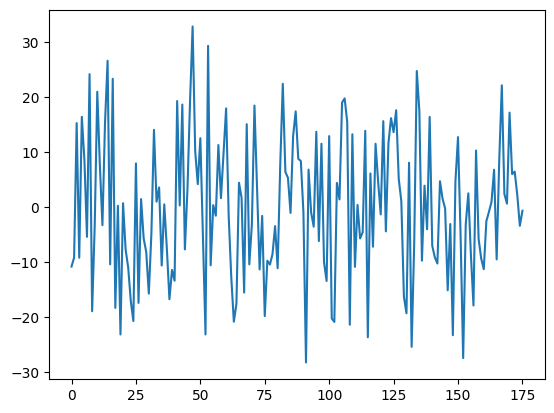

In [167]:
plt.plot(x[1])

In [168]:
y = np.array([1]*40+[0]*40)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [169]:
n = len(y)

arr = np.arange(n)
np.random.shuffle(arr)
arr

array([22, 31, 52, 40, 72, 21, 54, 48, 50,  1, 51, 30, 49, 45, 67, 15, 78,
        2, 58, 70, 33, 34, 69, 42,  9, 23, 10, 37, 73, 60, 13, 19, 62, 76,
       39, 79, 71, 24, 32, 77, 68, 28, 61, 20, 44, 55, 64, 14, 17, 66, 12,
       63,  5, 75, 59, 53, 38, 65, 29, 57,  3,  7,  4, 25, 41, 47, 16,  6,
       35, 43, 56, 27, 26,  0, 18, 74,  8, 46, 36, 11])

In [170]:
import math

X_train = x[arr[:math.floor(0.8 * n)]]
y_train = y[arr[:math.floor(0.8 * n)]]
X_test = x[arr[math.floor(0.8 * n):]]
y_test = y[arr[math.floor(0.8 * n):]]

#for i in arr:
#  print(x[i],y[i])

y_test

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [171]:
import sklearn
import xgboost

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn. dummy import DummyClassifier 
from sklearn. linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn. tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier 
from sklearn. ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [172]:
tup = (30,15,5,)

classifiers = [
    #DummyClassifier(strategy='stratified'),
    #LogisticRegression(),
    #KNeighborsClassifier(),
    #DecisionTreeClassifier(),
    #SVC(),
    #RandomForestClassifier(),
    #GaussianNB(),
    MLPClassifier(solver = 'sgd', hidden_layer_sizes = tup, activation = 'relu'),
    #GradientBoostingClassifier(),
    #AdaBoostClassifier(),
    #QuadraticDiscriminantAnalysis(),
    #XGBClassifier()
]

for clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy of {type(clf).__name__}: {accuracy:.4f}")

Accuracy of MLPClassifier: 0.5625


In [173]:
clf

MLPClassifier(hidden_layer_sizes=(30, 15, 5), solver='sgd')

In [174]:
import pickle

# save
with open('/content/drive/MyDrive/model1.pkl','wb') as f:
    pickle.dump(clf,f)

# Keep Runtime Up

In [ ]:
while True:
  bvcx = 0

KeyboardInterrupt: ignored